# Titanic Disaster Predicitve Data Analysis ⛴️

## Call in the libraries 📚

In [89]:
# Let's start with the basic libraries and we can add more as we see fit.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in the Dataset 📃

### We are using the Le Wagon™️ dataset. (Thank you Le Wagon!)

In [90]:
df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration 🔎🔎🔎

In [91]:
# What is the shape of the Data
df.shape

(891, 12)

In [92]:
# What data types do we have
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [93]:
# what can the basic caculations tell me about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
#Let's find out some basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
# Where and how many null values does the dataset have?
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
# class vs room.
df[['Cabin','Pclass']]

,Cabin,Pclass
0,NaN,3
1,C85,1
2,NaN,3
3,C123,1
4,NaN,3
...,...,...
886,NaN,2
887,B42,1
888,NaN,3
889,C148,1


### Observations:
- The Cabin Column seem to have the most missing data.
  - Solution: Drop from the list, too much missing data. 
- compairing the Pclass and Cabin tells us the 3rd class folk didn't have cabins.
- further class Analysis is needed. 


In [97]:
df.drop('Cabin', axis= 1, inplace= True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Classes Analysis 🔢

In [98]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [99]:
# Let's find out the number of tickets sold per Class (1,2,3)
pclass_df = df.groupby('Pclass').size().reset_index(name='Count')
pclass_df = pclass_df.set_index('Pclass')  # Set 'Pclass' as the new index
pclass_df.index.name = 'Pclass'  

pclass_df


,Count
Pclass,
1,216
2,184
3,491


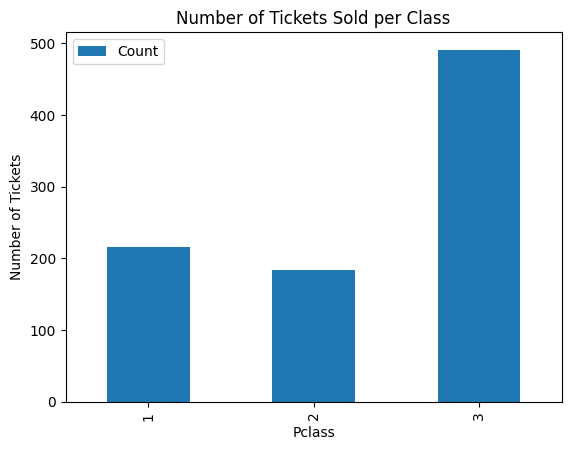

In [100]:
#Number are nice, but let's put it in a barchart

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the bar chart
pclass_df.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Pclass')
ax.set_ylabel('Number of Tickets')
ax.set_title('Number of Tickets Sold per Class')

# Show the plot
plt.show()


In [101]:
# let's check survival
survived_df = df.groupby('Survived').size().reset_index(name='Count')
survived_df = survived_df.set_index('Survived')  # Set 'Survived' as the new index
survived_df.index.name = 'Survived'  

survived_df

,Count
Survived,
0,549
1,342


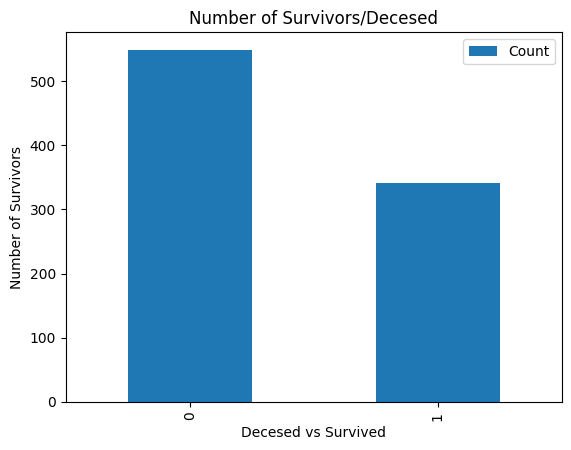

In [102]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the bar chart
survived_df.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Decesed vs Survived')
ax.set_ylabel('Number of Survivors')
ax.set_title('Number of Survivors/Decesed')
ax.legend()

# Show the plot
plt.show()

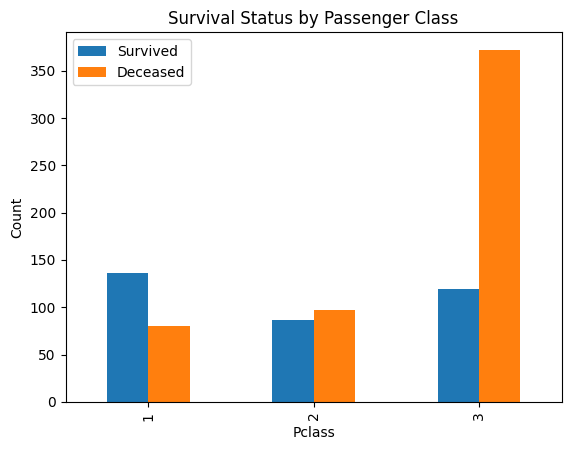

In [103]:
# Let's try with both!

# Group the data by Pclass and Survived columns and calculate the count
grouped = df.groupby(['Pclass', 'Survived']).size().unstack()

# Create a new DataFrame with the grouped data
survived_df = pd.DataFrame({
    'Survived': grouped[1],
    'Deceased': grouped[0]
})

# Plot the bar graph
survived_df.plot(kind='bar')

# Set the x-axis label
plt.xlabel('Pclass')

# Set the y-axis label
plt.ylabel('Count')

# Set the title
plt.title('Survival Status by Passenger Class')

# Set the legend
plt.legend()

# Show the plot
plt.show()


### Observations:
- A majority of the tickets bought were people in the 3rd or lowest class. 
- There were overall more deaths than people that survived 
- From what I can see it seem like the most death were people that had been in the 3rd or lowest class
- We can Check male or Female next.

## Gender Analysis 👨👩

In [106]:
# how many of each
df['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

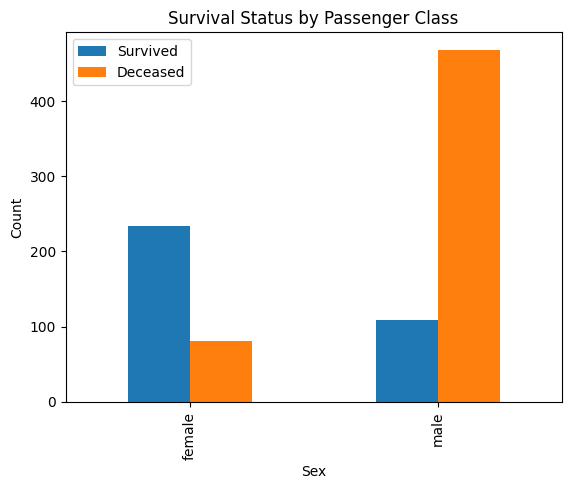

In [111]:
# Let's make a plot of those who survived by gender. 

# Group the data by Pclass and Survived columns and calculate the count
grouped = df.groupby(['Sex', 'Survived']).size().unstack()

# Create a new DataFrame with the grouped data
survived_df = pd.DataFrame({
    'Survived': grouped[1],
    'Deceased': grouped[0]
})

# Plot the bar graph
survived_df.plot(kind='bar')

# Set the x-axis label
plt.xlabel('Sex')

# Set the y-axis label
plt.ylabel('Count')

# Set the title
plt.title('Survival Status by Passenger Class')

# Set the legend
plt.legend()

# Show the plot
plt.show()

#### Observation: 
- More men died than women on the Titanic. 

## Children 👶

In [108]:
# Let's creat a boolean mask for children 
# Anyone under that age of 18 is considered a child. 
children_df = df[df['Age'] < 18]
children_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S


In [109]:
# Let's make a DF for just the children that survived.
survived_children_df = children_df.groupby('Survived').size().reset_index(name='Count')

survived_children_df = survived_children_df.set_index('Survived')  # Set 'Survived' as the new index
survived_children_df.index.name = 'Survived'  

survived_children_df

,Count
Survived,
0,52
1,61


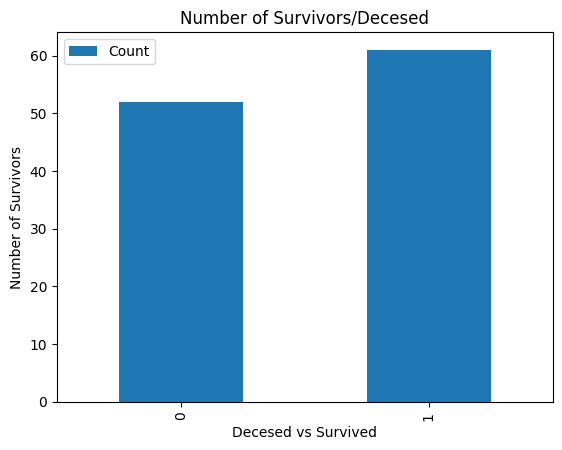

In [110]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the bar chart
survived_children_df.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Decesed vs Survived')
ax.set_ylabel('Number of Survivors')
ax.set_title('Number of Survivors/Decesed')
ax.legend()

# Show the plot
plt.show()

#### Observation: 
- Looks almost 50/50, but slight more children Survived.

### Let's make a plot to measure men, woman, and children.


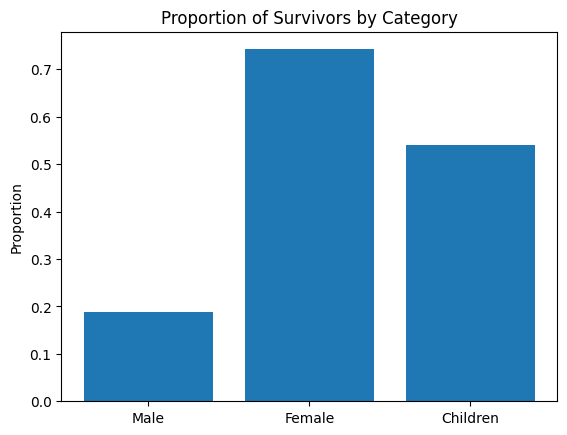

In [112]:
# Calculate the total count of each category (male, female, children)
total_male = df[df['Sex'] == 'male'].shape[0]
total_female = df[df['Sex'] == 'female'].shape[0]
total_children = df[df['Age'] < 18].shape[0]

# Calculate the count of survivors for each category
survived_male = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
survived_female = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
survived_children = df[(df['Age'] < 18) & (df['Survived'] == 1)].shape[0]

# Calculate the proportions of survivors to total count for each category
proportion_male = survived_male / total_male
proportion_female = survived_female / total_female
proportion_children = survived_children / total_children

# Create a DataFrame with the proportions
proportions_df = pd.DataFrame({
    'Category': ['Male', 'Female', 'Children'],
    'Proportion': [proportion_male, proportion_female, proportion_children]
})

# Plot the bar chart
plt.bar(proportions_df['Category'], proportions_df['Proportion'])

# Set the y-axis label
plt.ylabel('Proportion')

# Set the title
plt.title('Proportion of Survivors by Category')

# Show the plot
plt.show()


## Big Families

## Distinguished Titles